In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = np.array((100,109,103,109,96,112,103,101,101,100,96,93,111,109,107,104,113,95,101,105,92,100,77,74,69,58,72,63,69,73,54,51,56,49,49,49,74,56,80,57))
df = pd.DataFrame(data, columns = ['Xbar'])
# Inspect the dataset
df.head()

,Xbar
0,100
1,109
2,103
3,109
4,96


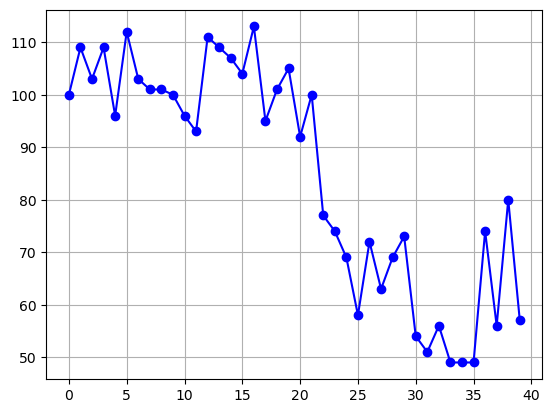

In [2]:
# Plot the data first
plt.plot(df, color='b', linestyle='-', marker='o')
plt.grid()
plt.show()

Runs test p-value = 0.000


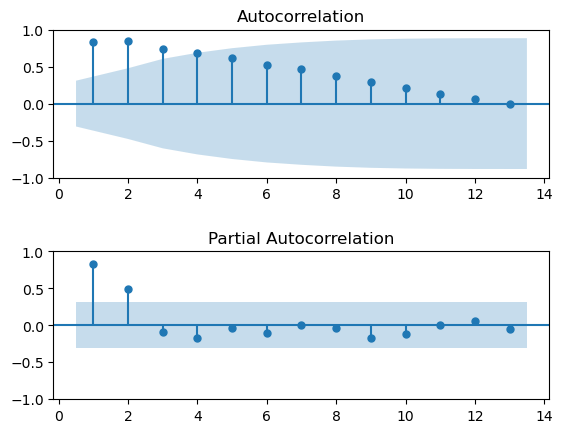

In [3]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(df['Xbar'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()


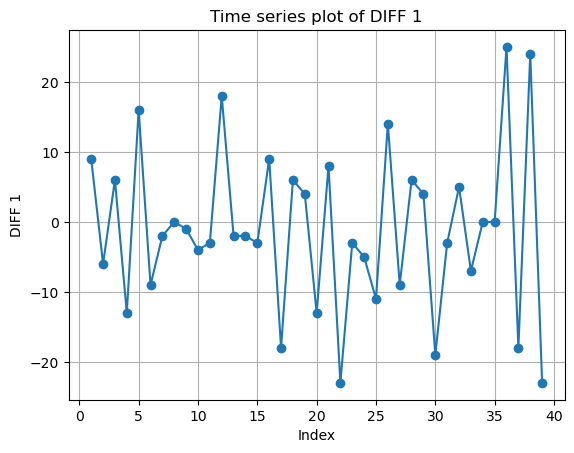

In [4]:
df['lag1'] = df['Xbar'].shift(1)
df['diff1'] = df['Xbar'].diff(1)

plt.plot(df['diff1'], 'o-')
plt.xlabel('Index')
plt.ylabel('DIFF 1')
plt.title('Time series plot of DIFF 1')
plt.grid()
plt.show()

Runs test p-value = 0.067


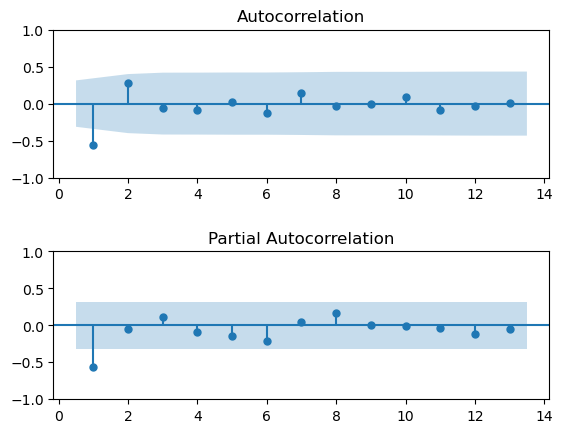

In [5]:
_, pval_runs = runstest_1samp(df['diff1'][1:], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(df['diff1'][1:], lags = int(len(df)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(df['diff1'][1:], lags = int(len(df)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

In [6]:
x = df['Xbar']
model = qda.ARIMA(x, order=(1,1,0), add_constant = False) 

qda.ARIMAsummary(model)

---------------------
ARIMA MODEL RESULTS
---------------------
ARIMA model order: p=1, d=1, q=0

FINAL ESTIMATES OF PARAMETERS
-------------------------------
 Term    Coef  SE Coef  T-Value    P-Value
ar.L1 -0.5994   0.1339  -4.4759 7.6083e-06

RESIDUAL SUM OF SQUARES
-------------------------
  DF        SS      MS
38.0 3500.1613 92.1095

Ljung-Box Chi-Square Statistics
----------------------------------
 Lag  Chi-Square  P-Value
  12      5.4209   0.9424
  24     13.5992   0.9552
  36     23.3651   0.9484


Shapiro-Wilk test p-value = 0.504


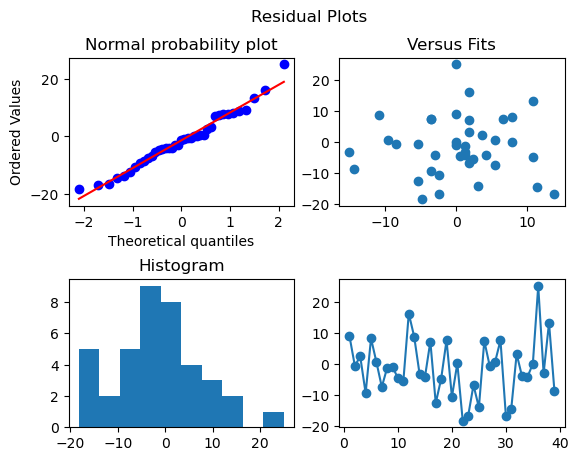

In [7]:
#extract the residuals
residuals = model.resid[1:]
fits = model.fittedvalues[1:]
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the residuals
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(fits, residuals)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

Runs test p-value on the residuals = 0.623


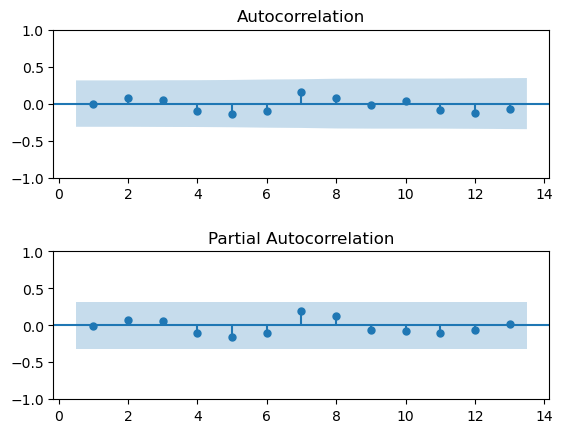

In [8]:
_, pval_runs_res = runstest_1samp(residuals, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

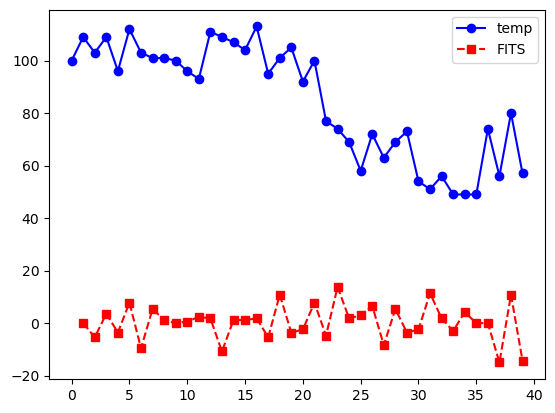

In [9]:
plt.plot(df['Xbar'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(model.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

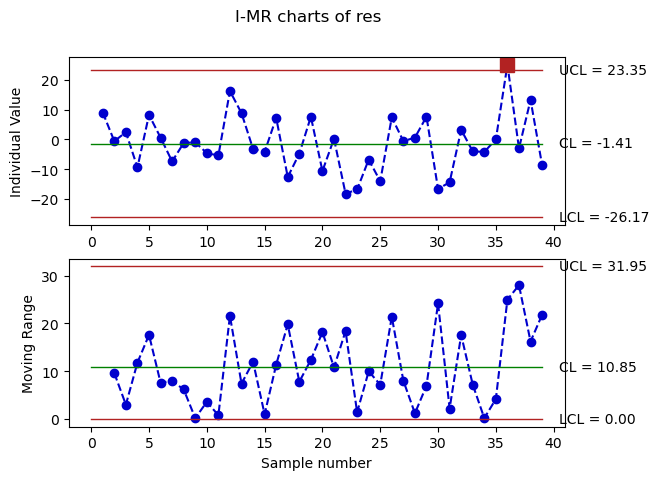

In [10]:
ARL=100
alpha=1/ARL
K_alpha=stats.norm.ppf(1-alpha/2)
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(model.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res',K=K_alpha)

> ## Point 2

In [17]:
# Define the array with the new observations
new_obs = np.array((49,69,78,68,70,77,77,85,73,86))

# Add the new observations to the dataset
new = df.append(pd.DataFrame(new_obs, columns=['Xbar']), ignore_index=True)

new.tail(15)

,Xbar,lag1,diff1
35,49,49.0,0.0
36,74,49.0,25.0
37,56,74.0,-18.0
38,80,56.0,24.0
39,57,80.0,-23.0
40,49,NaN,NaN
41,69,NaN,NaN
42,78,NaN,NaN
43,68,NaN,NaN
44,70,NaN,NaN


In [18]:
# Define the array with the new RESIDUALS
new_residual = np.array((-22.2,15.06,21.34,-4.44,-4.17,8.23,4.32,8,-7.06,5.59))

# Add the new observations to the dataset

new_data = df_SCC.append(pd.DataFrame(new_residual, columns=['res']), ignore_index=True)

new_data.tail(15)

,res
35,-2.1407e-16
36,2.5000e+01
37,-3.0155e+00
38,1.3211e+01
39,-8.6149e+00
40,-2.2200e+01
41,1.5060e+01
42,2.1340e+01
43,-4.4400e+00
44,-4.1700e+00


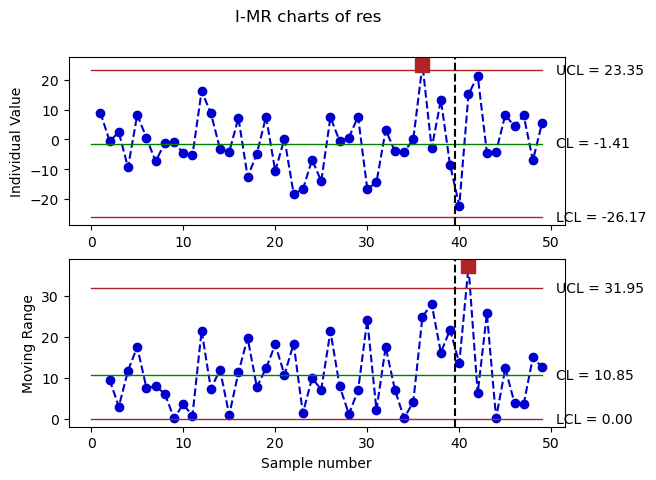

In [21]:
new_data_IMR = qda.ControlCharts.IMR(new_data, 'res',K=K_alpha,subset_size=len(df))

> ## Point 3

In [22]:
# Find the index of the I_TEST1 column different from NaN
OOC_idx = np.where(df_SCC_IMR['I_TEST1'].notnull())[0]
# Print the index of the OOC points
print('The index of the OOC point is: {}'.format(OOC_idx))

The index of the OOC point is: [36]


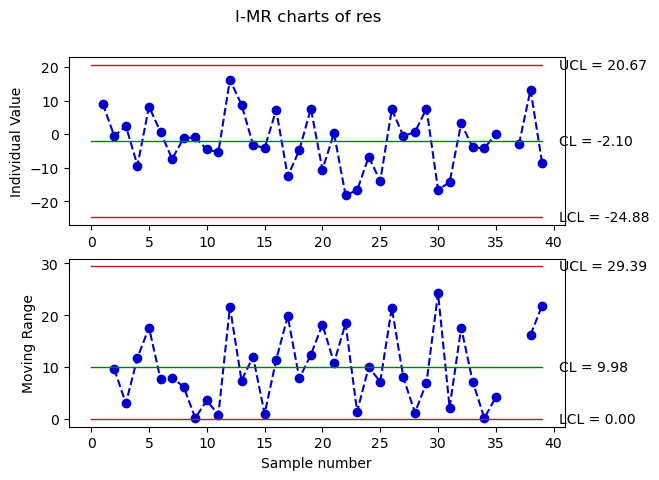

In [23]:
# make a copy of the data
data_2 = df_SCC.copy()
# replace the OOC point with NaN
data_2['res'].iloc[OOC_idx] = np.nan

# Plot the new control chart
df_SCC_IMR_new = qda.ControlCharts.IMR(data_2, 'res',K=K_alpha)